# Grid resolution study
## Rij correlation

In [1]:
%%capture
# Important header information
naluhelperdir = '../utilities/'
import sys
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, naluhelperdir)
import correlate as corr
from matplotlib.lines import Line2D
%matplotlib inline
# Define a useful function for pull stuff out of dicts
getparam = lambda keylabel, pdict, default: pdict[keylabel] if keylabel in pdict else default

### List of runs to compare

In [2]:
# Locations of all of the runs
baserundir = '../../'
NumReqCols = 3   # Number of required columns in the table

# Index of all runs here
runlist=[
    # Name,                     Location,                                       file, style dict
    # -- NaluWind runs --
    ['Nalu-Wind dx=10m',        'NaluWindRuns/stable/05ms/05ms_iter02/',  'stable05_avgRij_30001_39981_500_iplane_0.dat',  {'color':'b', 'lw':0.75, 'lstyle':'-'}],
    ['Nalu-Wind dx=5m',         'NaluWindRuns/stable/05ms/05ms_5x5x2.5/', 'stable05_avgRij_40000_49980_500_iplane_0.dat',  {'color':'b', 'lw':0.75, 'lstyle':'--'}],
    ['AMR-Wind dx=2.5m',        'AMRWindRuns/stable/05ms/sim_dx2.5/',     'stable05_avgRij_0_2500_501_iplane_0.dat',       {'color':'r', 'lw':1.25, 'lstyle':'-.'}],
]

# Stuff for saving figures
savefigs = True
figdir   = '../../Paper/figures/'

### Plot Longitudinal Rij

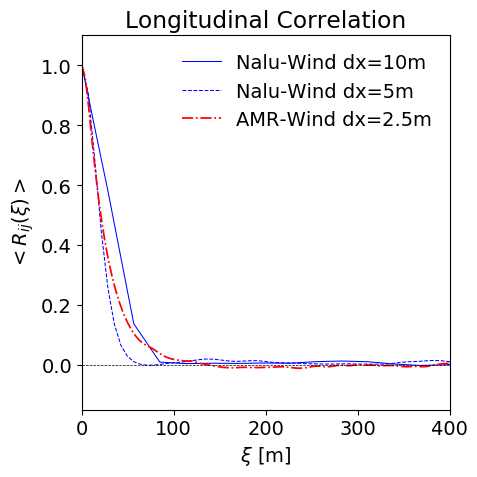

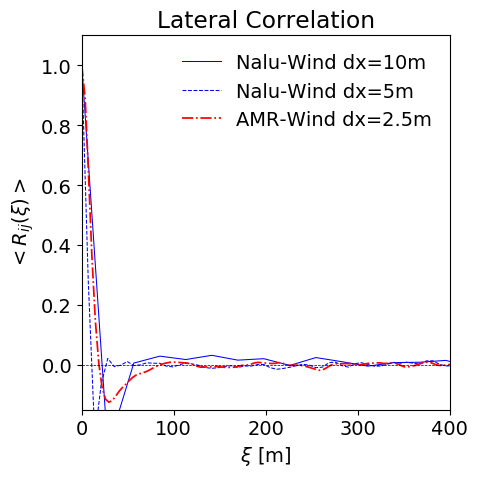

In [4]:
# --- Paper version ---
plt.figure("long", figsize=(5,5),dpi=100)
plt.figure("lat",  figsize=(5,5),dpi=100)
plt.rc('font', size=14)
for irun, run in enumerate(runlist[:]):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    rundir   = run[1]
    datafile = run[2]
    
    RijData  = np.loadtxt(baserundir+'/'+rundir+'/'+datafile)
    plt.figure("long")
    plt.plot(RijData[:,0], RijData[:,1], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)
    plt.figure("lat")
    plt.plot(RijData[:,2], RijData[:,3], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)

#for hh in plotheights: plt.hlines(hh, 0, 35, linestyles='dashed', linewidth=0.5)

# Construct a legend
plt.figure("long")
plt.legend(loc='upper right',frameon=False)
plt.ylim([-0.15, 1.1]);
plt.xlim([0, 400])
plt.xlabel(r'$\xi$ [m]')
plt.ylabel(r'$<R_{ij}(\xi)>$')
#plt.grid()
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.title(r'Longitudinal Correlation');
plt.tight_layout()

plt.figure("lat")
plt.legend(loc='upper right',frameon=False)
plt.ylim([-0.15, 1.1]);
plt.xlim([0, 400])
plt.xlabel(r'$\xi$ [m]')
plt.ylabel(r'$<R_{ij}(\xi)>$')
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
#plt.grid()
plt.title(r'Lateral Correlation');
plt.tight_layout()

if savefigs:
    plt.figure("long")
    plt.savefig(figdir+'/'+'GridStudy_Rij_Longitudinal.png')
    plt.figure("lat")
    plt.savefig(figdir+'/'+'GridStudy_Rij_Lateral.png')